# A 21
## a)

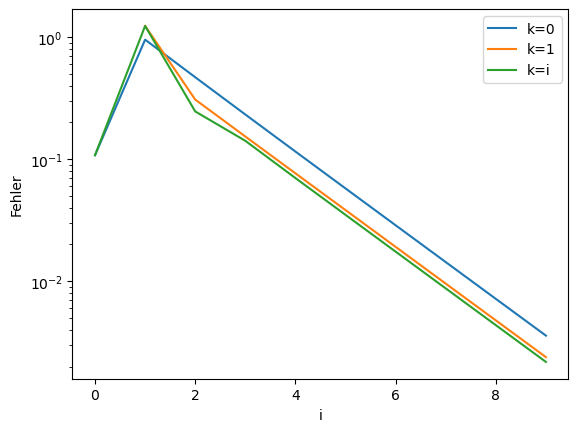

In [2]:
import numpy as np


def f(x): 
    return (x-1)**(1/5)


def intf(x0):
    return (2)**(1/5) * 5 / 3 - 5 / 6 * (x0-1)**(6/5)


def romberg(start):
    stop = 3
    float2 = np.float64(2)

    n_range = np.arange(0, 10)
    h_range = (stop - start) * float2 ** -n_range

    T_arr = np.empty([10,10])
    m_n = np.empty([10])
    T_arr[0, 0] = h_range[1]*(f(start)+f(stop))
    m_n[0] = 0

    for n in n_range[1:9]:
        i_range = np.arange(0, 2**n)
        m_n[n] = h_range[n] * np.sum(f(start + (2 * i_range + 1) * h_range[n+1]))

    for n in n_range[1:10]:
        T_arr[n, 0] = 1/2 * (T_arr[n-1, 0] + m_n[n-1])

    for k in n_range[1:10]:
        T_arr[k:, k] = (4**k * T_arr[k:, k-1] - T_arr[k-1:-1,k-1]) / (4**k - 1)


    return T_arr



import matplotlib.pyplot as plt


start = 1.2
error = abs(romberg(start) - intf(start))
i_range = np.arange(0,10)


fig, ax = plt.subplots()

for k in [0,1]:
    plot_range = i_range[k:]
    ax.semilogy(plot_range, error[plot_range, k], label='k=%i' %k)

ax.semilogy(i_range, error[i_range,i_range], label='k=i')
ax.set(xlabel='i', ylabel='Fehler')
ax.legend()

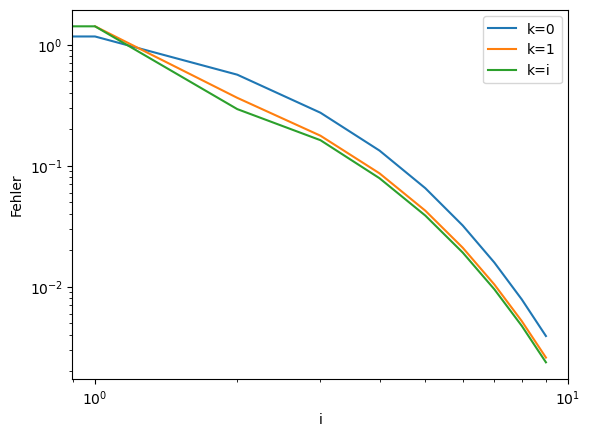

In [3]:
import matplotlib.pyplot as plt


start = 1.005
error = abs(romberg(start) - intf(start))
i_range = np.arange(0,10)


fig, ax = plt.subplots()

for k in [0,1]:
    plot_range = i_range[k:]
    ax.semilogy(plot_range, error[plot_range, k], label='k=%i' %k)

ax.loglog(i_range, error[i_range,i_range], label='k=i')
ax.set(xlabel='i', ylabel='Fehler')
ax.legend()

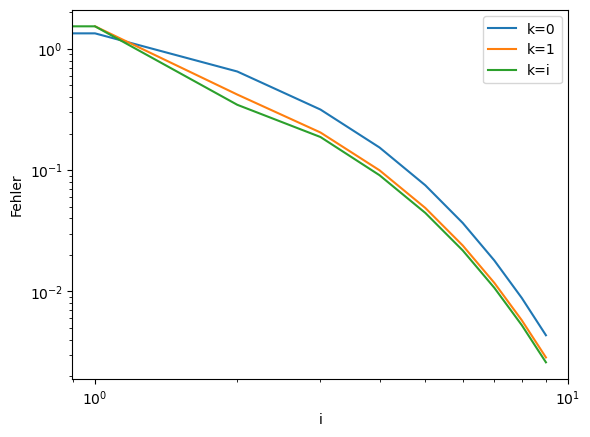

In [4]:
import matplotlib.pyplot as plt


start = 1
error = abs(romberg(start) - intf(start))
i_range = np.arange(0,10)


fig, ax = plt.subplots()

for k in [0,1]:
    plot_range = i_range[k:]
    ax.semilogy(plot_range, error[plot_range, k], label='k=%i' %k)

ax.loglog(i_range, error[i_range,i_range], label='k=i')
ax.set(xlabel='i', ylabel='Fehler')
ax.legend()

# b)

In [5]:
for start in [1.2, 1.005, 1]:
    error = abs(romberg(start)[:,0] - intf(start))
    print(error[:-1]/error[1:])

[0.11315633 2.0308726  2.01913108 2.01060424 2.00551263 2.00279024
 2.00140013 2.00070082 2.00035054]
[0.3611114  2.06832564 2.06219929 2.0538692  2.04410649 2.03361309
 2.02336807 2.01460819 2.00825934]
[0.57142857 2.06236436 2.05863708 2.05385615 2.04876554 2.04375909
 2.03903034 2.03466469 2.03069013]


Der Fehlerquotioent ist größer je näher der Start des Integrals an 1 liegt.
Für steigende i wird der Fehlerquotioent kleiner.